In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [22]:
file_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/clean/environment/260.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

## Temperature

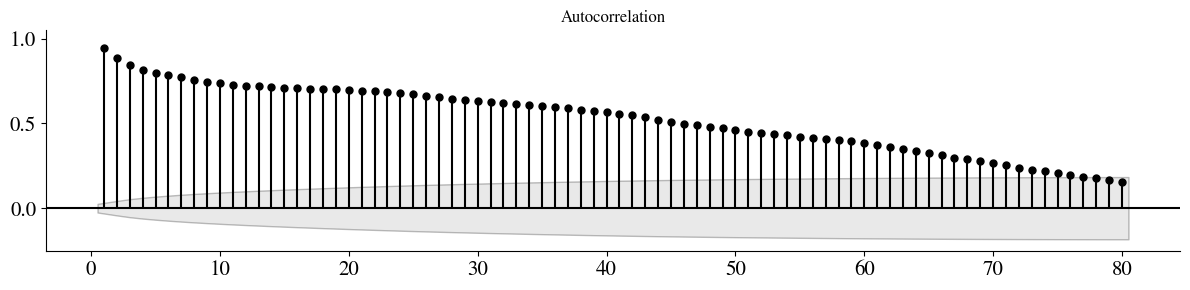

In [76]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Reset matplotlib style
plt.style.use('default')

# Set custom font
plt.rcParams['font.family'] = 'STIXGeneral'

# Create ACF plot
fig, ax = plt.subplots(figsize=(12, 3))
acf_result = plot_acf(df['temp_mean'], lags=80, ax=ax, zero=False)


# Customize plot to match user specifications
for line in ax.lines:
    line.set_color('black')  # ACF bars

for collection in ax.collections:
    collection.set_facecolor('darkgray')  # Confidence interval as light gray
    collection.set_edgecolor('black')

ax.set_facecolor('white')
ax.set_ylim(-0.25, 1.05)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='both', colors='black', labelsize=15)
# ax.set_ylabel('ACF', fontsize=20, color='black', labelpad=0.0005)
# ax.set_xlabel('Lag', fontsize=, color='black', labelpad=15)

plt.tight_layout()
plt.show()


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Select years and set up the plot
selected_years = sorted(df_clean['year'].unique())[-6:]
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_style("white")

for i, year in enumerate(reversed(selected_years)):
    values = df_clean[df_clean['year'] == year]['temp_mean'].dropna().values

    # Compute KDE manually
    kde = gaussian_kde(values, bw_method=0.3)
    x_vals = np.linspace(0, np.max(values), 300)
    y_vals = kde(x_vals)
    y_shifted = y_vals + i  # stack vertically

    ax.fill_between(x_vals, i, y_shifted, color='black')
    ax.axhline(i, color='black', lw=1)
    ax.text(-5, i, str(year), fontsize=10, va='center', fontweight='bold')

# Final styling
ax.set_xlim(0, np.max(df_clean['temp_mean']))
ax.set_ylim(-1, len(selected_years))
ax.set_yticks([])
ax.set_xticks([])
sns.despine(left=True, bottom=True)
ax.set_facecolor("white")
plt.tight_layout()
plt.show()


NameError: name 'df_clean' is not defined

## Precipitation

<Figure size 1000x400 with 0 Axes>

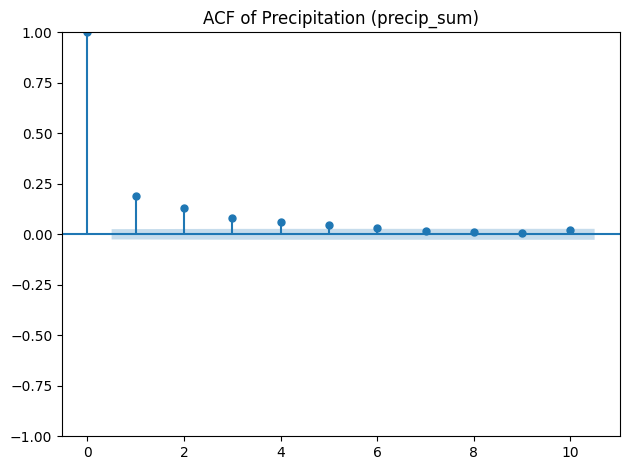

In [25]:
plt.figure(figsize=(10, 4))
plot_acf(df['precip_sum'], lags=10)
plt.title('ACF of Precipitation (precip_sum)')
plt.tight_layout()
plt.show()